In [1]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

In [2]:
NIJ_Training_df= pd.read_csv("NIJ_s_Recidivism_Challenge_Training_Dataset-sara.csv")

In [3]:
NIJ_Training_df.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [4]:
x_train =NIJ_Training_df[NIJ_Training_df.columns[0:-4]]
x_train.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [5]:
# Number of records having null Values in each column
x_train.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      2217
Supervision_Risk_Score_First                          330
Supervision_Level_First                              1212
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       2321
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

In [6]:
# Total Number of Records in a Dataset with null values in any column
x_train.isna().any(axis=1).sum()

8190

In [7]:
# Find the Categoricorical columns for feature engineering(get Dummies)
cat_columns=[col for col in x_train.columns if x_train[col].dtypes=='O']
x_train[cat_columns].isnull().sum()

Gender                                         0
Race                                           0
Age_at_Release                                 0
Gang_Affiliated                             2217
Supervision_Level_First                     1212
Education_Level                                0
Dependents                                     0
Prison_Offense                              2321
Prison_Years                                   0
Prior_Arrest_Episodes_Felony                   0
Prior_Arrest_Episodes_Misd                     0
Prior_Arrest_Episodes_Violent                  0
Prior_Arrest_Episodes_Property                 0
Prior_Arrest_Episodes_Drug                     0
Prior_Arrest_Episodes_PPViolationCharges       0
Prior_Conviction_Episodes_Felony               0
Prior_Conviction_Episodes_Misd                 0
Prior_Conviction_Episodes_Prop                 0
Prior_Conviction_Episodes_Drug                 0
Delinquency_Reports                            0
Program_Attendances 

In [8]:
x_train[cat_columns].isna().any(axis=1).sum()

5211

In [9]:
cat_variables = x_train[cat_columns]
# print(cat_variables)
cat_dummies = pd.get_dummies(cat_variables,dummy_na=True)
print(cat_dummies.head())

   Gender_F  Gender_M  Gender_nan  Race_BLACK  Race_WHITE  Race_nan  \
0         0         1           0           1           0         0   
1         0         1           0           1           0         0   
2         0         1           0           1           0         0   
3         0         1           0           0           1         0   
4         0         1           0           0           1         0   

   Age_at_Release_18-22  Age_at_Release_23-27  Age_at_Release_28-32  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Age_at_Release_33-37  ...  Program_UnexcusedAbsences_0  \
0                     0  ...                            1   
1                     1 

In [10]:
x_train.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [11]:
x_train = x_train.drop(cat_columns, axis=1)

In [12]:
x_train.columns

Index(['ID', 'Residence_PUMA', 'Supervision_Risk_Score_First',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Viol',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
       'Condition_Other', 'Violations_ElectronicMonitoring',
       'Violations_Instruction', 'Violations_FailToReport',
       'Violations_MoveWithoutPermission', 'Avg_Days_per_DrugTest',
       'DrugTests_THC_Positive', 'DrugTests_Cocaine_Positive',
       'DrugTests_Meth_Positive', 'DrugTests_Other_Positive',
       'Percent_Days_Employed', 'Jobs_Per_Year', 'Employment_Exempt'],
      dtype='object')

8 - null
get dummies, dummy_na - gang_affiliated _false=np.null, gangaffliated_true= np.nullgang_affiliated_nan=1
drop ganga_affliated_nan

In [13]:
x_train = pd.concat([x_train, cat_dummies], axis=1)
print(x_train.columns)

Index(['ID', 'Residence_PUMA', 'Supervision_Risk_Score_First',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Viol',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       ...
       'Program_UnexcusedAbsences_0', 'Program_UnexcusedAbsences_1',
       'Program_UnexcusedAbsences_2', 'Program_UnexcusedAbsences_3 or more',
       'Program_UnexcusedAbsences_nan', 'Residence_Changes_0',
       'Residence_Changes_1', 'Residence_Changes_2',
       'Residence_Changes_3 or more', 'Residence_Changes_nan'],
      dtype='object', length=161)


In [14]:
x_train.loc[x_train.Gang_Affiliated_nan == 1, ["Gang_Affiliated_False", "Gang_Affiliated_True"]] = np.nan
# x_train.drop('Gang_Affiliated_nan',axis=1)


In [15]:
x_train.loc[x_train.Supervision_Level_First_nan == 1, ["Supervision_Level_First_High", "Supervision_Level_First_Specialized","Supervision_Level_First_Standard"]] = np.nan
# x_train.drop('Supervision_Level_First_nan',axis=1)

In [16]:
x_train.loc[x_train.Prison_Offense_nan == 1, ["Prison_Offense_Drug", "Prison_Offense_Other","Prison_Offense_Property","Prison_Offense_Violent/Non-Sex","Prison_Offense_Violent/Sex"]] = np.nan
# x_train.drop('Prison_Offense_nan',axis=1)

In [17]:
x_train.drop(['Gender_nan','Race_nan','Age_at_Release_nan','Gang_Affiliated_nan','Supervision_Level_First_nan','Education_Level_nan','Dependents_nan','Prison_Offense_nan','Prison_Years_nan','Prior_Arrest_Episodes_Felony_nan','Prior_Arrest_Episodes_Misd_nan','Prior_Arrest_Episodes_Violent_nan','Prior_Arrest_Episodes_Property_nan','Prior_Arrest_Episodes_Drug_nan','Prior_Arrest_Episodes_PPViolationCharges_nan','Prior_Conviction_Episodes_Felony_nan','Prior_Conviction_Episodes_Misd_nan','Prior_Conviction_Episodes_Prop_nan','Prior_Conviction_Episodes_Drug_nan','Delinquency_Reports_nan','Program_Attendances_nan','Program_UnexcusedAbsences_nan','Residence_Changes_nan'],axis=1,inplace=True)

In [18]:
x_train_nan_values = x_train[x_train.isna().any(axis=1)]
len(x_train_nan_values)

8190

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
x_train = pd.DataFrame(imputer.fit_transform(x_train),columns = x_train.columns)

In [20]:
x_train.isna().any()

ID                                     False
Residence_PUMA                         False
Supervision_Risk_Score_First           False
Prior_Arrest_Episodes_DVCharges        False
Prior_Arrest_Episodes_GunCharges       False
                                       ...  
Program_UnexcusedAbsences_3 or more    False
Residence_Changes_0                    False
Residence_Changes_1                    False
Residence_Changes_2                    False
Residence_Changes_3 or more            False
Length: 138, dtype: bool

In [21]:
x_train.isna().sum().sum()

0

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\Vimalathithan\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\VIMALA~1\AppData\Local\Temp\tmpikqfpg04
  JVM stdout: C:\Users\VIMALA~1\AppData\Local\Temp\tmpikqfpg04\h2o_Vimalathithan_started_from_python.out
  JVM stderr: C:\Users\VIMALA~1\AppData\Local\Temp\tmpikqfpg04\h2o_Vimalathithan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_Vimalathithan_wz1old
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.542 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
NIJ_Train_Mod = h2o.import_file("NIJ_s_Recidivism_Challenge_Training_Dataset-sara.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
NIJ_Train_Mod["Recidivism_Arrest_Year1"]=NIJ_Train_Mod["Recidivism_Arrest_Year1"].asfactor()

In [5]:
NIJ_Train_Mod.describe()

Rows:18028
Cols:53




,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
type,int,enum,enum,enum,int,enum,int,enum,enum,int,enum,enum,int,int,int,int,int,int,enum,enum,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,real,real,real,real,real,real,real,enum,enum,enum,enum,enum
mins,1.0,,,,1.0,,1.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,,0.0,0.0,,,,,,,,,,,,,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
mean,13386.065342800088,,,,12.307577102285334,,6.064753079444005,,,0.812723373838456,,,4.414911449602799,2.0828792191947945,0.6597998822836962,1.4095408895265422,1.3619173262972735,1.4528496645284967,,,0.8324328437714025,1.0695922948801506,,0.6161360601588306,0.3367316341829085,,,,,,,,,,,,,0.36162238136670904,1.9260880598908772,0.168132468005095,0.5673466841350053,93.5858598589523,0.06312002135558488,0.014172916040219505,0.012768276397193669,0.007681323101278133,0.48003490711381985,0.7664227222145307,,,,,
maxs,26761.0,,,,25.0,,10.0,,,2.0,,,9.0,5.0,2.0,4.0,4.0,4.0,,,2.0,3.0,,2.0,1.0,,,,,,,,,,,,,3.0,9.0,2.0,2.0,1087.0,1.0,1.0,1.0,1.0,1.0,8.0,,,,,
sigma,7721.4519921005185,,,,7.143255483699997,,2.382810692938381,,,0.8167430677526973,,,2.4116594385660526,1.67257483980013,0.7428877504621911,1.3091293195913845,1.3107390889979271,1.3851498561202298,,,0.7772946645801881,1.066248561059514,,0.750285071892752,0.4726099706580711,,,,,,,,,,,,,0.8430023110788695,2.7639959132384333,0.4887386930153355,0.7305650615200656,117.56134050131499,0.13835671043544065,0.06347303019200731,0.0595718800725739,0.04222438425341268,0.42439649611104074,0.8134739701739367,,,,,
zeros,0,,,,0,,0,,,5599,,,172,2853,7705,4561,5563,4718,,,5255,5507,,7784,8848,,,,,,,,,,,,,12248,9534,14531,9245,0,9893,13073,12975,13328,5713,5455,,,,,
missing,0,0,0,0,0,2217,330,1212,0,5437,2321,0,4307,5733,2737,4088,2110,4465,0,0,4887,4219,0,3799,4688,0,0,0,0,0,0,0,0,0,0,0,0,3087,2266,1541,1999,4260,3632,3632,3632,3632,307,534,0,0,0,0,0
0,1.0,M,BLACK,43-47,16.0,false,3.0,Standard,At least some college,nan,Drug,More than 3 years,6.0,nan,1.0,3.0,3.0,4.0,false,false,nan,3.0,false,2.0,nan,false,false,false,false,false,true,true,false,false,false,false,false,0.0,6.0,0.0,2.0,612.0,0.0,0.0,0.0,0.0,0.488562092,0.447610294,false,false,false,false,false
1,2.0,M,BLACK,33-37,16.0,false,6.0,Specialized,Less than HS diploma,1.0,Violent/Non-Sex,More than 3 years,7.0,nan,nan,0.0,3.0,nan,true,false,nan,nan,true,0.0,nan,true,true,true,false,false,false,false,false,false,true,false,false,nan,0.0,0.0,2.0,35.66666667,0.0,0.0,0.0,0.0,0.425233645,2.0,false,true,false,false,true
2,3.0,M,BLACK,48 or older,24.0,false,7.0,High,At least some college,nan,Drug,1-2 years,6.0,nan,nan,2.0,2.0,nan,true,false,nan,2.0,true,1.0,nan,false,true,false,false,false,true,true,false,false,true,false,

In [6]:
y= "Recidivism_Arrest_Year1"
NIJ_Train_Mod=NIJ_Train_Mod.drop(["ID","Recidivism_Within_3years","Recidivism_Arrest_Year2","Recidivism_Arrest_Year3"],axis=1)
x= NIJ_Train_Mod.columns
print(x)


['Gender', 'Race', 'Age_at_Release', 'Residence_PUMA', 'Gang_Affiliated', 'Supervision_Risk_Score_First', 'Supervision_Level_First', 'Education_Level', 'Dependents', 'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop', 'Prior_Conviction_Episodes_Drug', 'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Violations_ElectronicMonitoring', 'Violations_Instruction', 'Violations_FailToReport', 'Violati

In [7]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = NIJ_Train_Mod)

AutoML progress: |
06:17:10.678: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [8]:
lb = aml.leaderboard

In [9]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210528_061710,0.867471,0.40513,0.721791,0.219541,0.365792,0.133804
GBM_1_AutoML_20210528_061710,0.864168,0.410363,0.713609,0.21977,0.368063,0.13547
StackedEnsemble_BestOfFamily_AutoML_20210528_061710,0.864058,0.409899,0.713256,0.219616,0.368111,0.135506
GBM_2_AutoML_20210528_061710,0.863699,0.410663,0.712505,0.219131,0.368405,0.135722
GBM_grid__1_AutoML_20210528_061710_model_1,0.862715,0.413537,0.712251,0.221504,0.369357,0.136425
GBM_5_AutoML_20210528_061710,0.862392,0.411906,0.711023,0.221938,0.369111,0.136243
GBM_3_AutoML_20210528_061710,0.859444,0.41611,0.702074,0.224182,0.371412,0.137947
GBM_4_AutoML_20210528_061710,0.858616,0.418236,0.704776,0.228805,0.372262,0.138579
XRT_1_AutoML_20210528_061710,0.818852,0.473279,0.635521,0.257104,0.39568,0.156562
DRF_1_AutoML_20210528_061710,0.818494,0.473402,0.63413,0.255788,0.395534,0.156447


In [10]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210528_061710,0.867471,0.40513,0.721791,0.219541,0.365792,0.133804
GBM_1_AutoML_20210528_061710,0.864168,0.410363,0.713609,0.21977,0.368063,0.13547
StackedEnsemble_BestOfFamily_AutoML_20210528_061710,0.864058,0.409899,0.713256,0.219616,0.368111,0.135506
GBM_2_AutoML_20210528_061710,0.863699,0.410663,0.712505,0.219131,0.368405,0.135722
GBM_grid__1_AutoML_20210528_061710_model_1,0.862715,0.413537,0.712251,0.221504,0.369357,0.136425
GBM_5_AutoML_20210528_061710,0.862392,0.411906,0.711023,0.221938,0.369111,0.136243
GBM_3_AutoML_20210528_061710,0.859444,0.41611,0.702074,0.224182,0.371412,0.137947
GBM_4_AutoML_20210528_061710,0.858616,0.418236,0.704776,0.228805,0.372262,0.138579
XRT_1_AutoML_20210528_061710,0.818852,0.473279,0.635521,0.257104,0.39568,0.156562
DRF_1_AutoML_20210528_061710,0.818494,0.473402,0.63413,0.255788,0.395534,0.156447


In [11]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [12]:
metalearner.coef_norm()

{'Intercept': -1.5513084495297385,
 'GBM_1_AutoML_20210528_061710': 0.5105255495423108,
 'GBM_2_AutoML_20210528_061710': 0.46958082297640646,
 'GBM_grid__1_AutoML_20210528_061710_model_1': 0.3403355892744305,
 'GBM_5_AutoML_20210528_061710': 0.3784814600766142,
 'GBM_3_AutoML_20210528_061710': 0.09444636609576594,
 'GBM_4_AutoML_20210528_061710': 0.29942092112786983,
 'XRT_1_AutoML_20210528_061710': 0.0,
 'DRF_1_AutoML_20210528_061710': 0.0,
 'GLM_1_AutoML_20210528_061710': 0.0,
 'DeepLearning_1_AutoML_20210528_061710': 0.0}

In [25]:
se.confusion_matrix

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210528_061710

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08650724292190123
RMSE: 0.2941211364759446
LogLoss: 0.2874831484579681
Null degrees of freedom: 10050
Residual degrees of freedom: 10044
Null deviance: 12311.739370630861
Residual deviance: 5778.986250302074
AIC: 5792.986250302074
AUC: 0.9538420395181154
AUCPR: 0.9041127762990673
Gini: 0.9076840790362308

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4189203634519596: 


,,false,true,Error,Rate
0,false,6310.0,707.0,0.1008,(707.0/7017.0)
1,true,430.0,2604.0,0.1417,(430.0/3034.0)
2,Total,6740.0,3311.0,0.1131,(1137.0/10051.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.418920,0.820804,198.0
1,max f2,0.302755,0.869886,243.0
2,max f0point5,0.575095,0.845452,142.0
3,max accuracy,0.497913,0.890260,170.0
4,max precision,0.974528,1.000000,0.0
5,max recall,0.039182,1.000000,367.0
6,max specificity,0.974528,1.000000,0.0
7,max absolute_mcc,0.449960,0.740427,186.0
8,max min_per_class_accuracy,0.390189,0.880433,209.0
9,max mean_per_class_accuracy,0.379330,0.882769,213.0



Gains/Lift Table: Avg response rate: 30.19 %, avg score: 30.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010049,0.927209,3.312788,3.312788,1.000000,0.945343,1.000000,0.945343,0.033289,0.033289,231.278840,231.278840,0.033289
1,2,0.020098,0.904970,3.312788,3.312788,1.000000,0.914873,1.000000,0.930108,0.033289,0.066579,231.278840,231.278840,0.066579
2,3,0.030047,0.886254,3.312788,3.312788,1.000000,0.894465,1.000000,0.918306,0.032960,0.099539,231.278840,231.278840,0.099539
3,4,0.040096,0.867489,3.181589,3.279907,0.960396,0.876064,0.990074,0.907719,0.031971,0.131510,218.158886,227.990712,0.130940
4,5,0.050045,0.851382,3.279661,3.279858,0.990000,0.858894,0.990060,0.898012,0.032630,0.164140,227.966051,227.985810,0.163427
5,6,0.100090,0.772752,3.207411,3.243635,0.968191,0.809886,0.979125,0.853949,0.160514,0.324654,220.741143,224.363476,0.321661
6,7,0.150035,0.700132,3.009226,3.165602,0.908367,0.738196,0.955570,0.815416,0.150297,0.474951,200.922611,216.560218,0.465402
7,8,0.200080,0.620309,2.693699,3.047568,0.813121,0.661551,0.919940,0.776931,0.134806,0.609756,169.369872,204.756765,0.586812
8,9,0.300070,0.464755,2.040414,2.711961,0.615920,0.543442,0.818634,0.699127,0.204021,0.813777,104.041395,171.196106,0.735824
9,10,0.400060,0.316539,1.114152,2.312608,0.336318,0.388493,0.698085,0.621488,0.111404,0.925181,11.415172,131.260807,0.752173




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13380359504990866
RMSE: 0.3657917372630342
LogLoss: 0.40513002313124813
Null degrees of freedom: 18027
Residual degrees of freedom: 18021
Null deviance: 21973.615935551534
Residual deviance: 14607.368114020283
AIC: 14621.368114020283
AUC: 0.86747107770566
AUCPR: 0.7217905216811624
Gini: 0.73494215541132

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35604976499101815: 


,,false,true,Error,Rate
0,false,10016.0,2635.0,0.2083,(2635.0/12651.0)
1,true,1241.0,4136.0,0.2308,(1241.0/5377.0)
2,Total,11257.0,6771.0,0.215,(3876.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.356050,0.680935,224.0
1,max f2,0.120672,0.791223,324.0
2,max f0point5,0.524412,0.672153,157.0
3,max accuracy,0.524412,0.800588,157.0
4,max precision,0.981574,1.000000,0.0
5,max recall,0.011920,1.000000,389.0
6,max specificity,0.981574,1.000000,0.0
7,max absolute_mcc,0.367843,0.530751,219.0
8,max min_per_class_accuracy,0.342223,0.780808,230.0
9,max mean_per_class_accuracy,0.275598,0.781794,257.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.909022,3.130514,3.130514,0.933702,0.933374,0.933702,0.933374,0.031430,0.031430,213.051394,213.051394,0.030482
1,2,0.020024,0.885657,3.054772,3.092748,0.911111,0.896438,0.922438,0.914957,0.030500,0.061930,205.477238,209.274807,0.059717
2,3,0.030009,0.859976,2.943012,3.042928,0.877778,0.872478,0.907579,0.900824,0.029384,0.091315,194.301242,204.292844,0.087363
3,4,0.040049,0.841492,3.019371,3.037023,0.900552,0.850637,0.905817,0.888242,0.030314,0.121629,201.937144,203.702288,0.116254
4,5,0.050033,0.821851,2.663613,2.962506,0.794444,0.831180,0.883592,0.876855,0.026595,0.148224,166.361251,196.250640,0.139924
5,6,0.100011,0.736056,2.563905,2.763316,0.764706,0.777556,0.824182,0.827233,0.128138,0.276362,156.390509,176.331628,0.251305
6,7,0.150044,0.660804,2.338038,2.621505,0.697339,0.697129,0.781885,0.783849,0.116980,0.393342,133.803830,162.150455,0.346705
7,8,0.200022,0.586668,1.975956,2.460207,0.589345,0.623198,0.733777,0.743709,0.098754,0.492096,97.595588,146.020689,0.416213
8,9,0.300033,0.449115,1.729397,2.216604,0.515807,0.517508,0.661120,0.668308,0.172959,0.665055,72.939713,121.660364,0.520165
9,10,0.399989,0.326906,1.294977,1.986293,0.386238,0.386662,0.592428,0.597926,0.129440,0.794495,29.497673,98.629277,0.562181


<bound method H2OBinomialModel.confusion_matrix of >

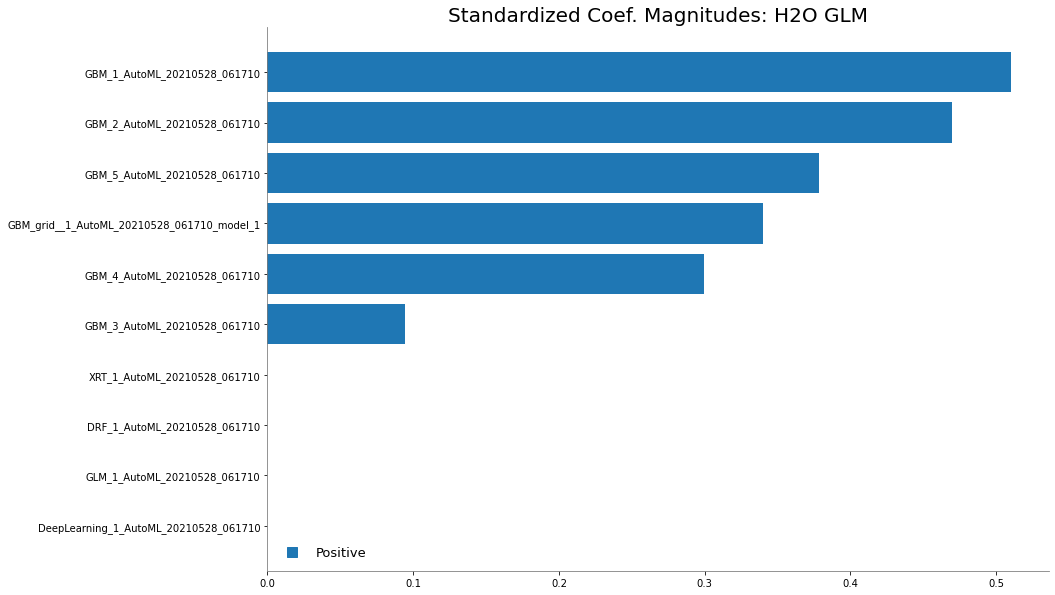

In [13]:
%matplotlib inline
metalearner.std_coef_plot()

In [18]:
gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20210528_061710


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,81.0,81.0,57885.0,6.0,6.0,6.0,18.0,64.0,53.45679




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10043555525361032
RMSE: 0.31691569108141415
LogLoss: 0.3235122611131131
Mean Per-Class Error: 0.144020838279167
AUC: 0.9339457207041229
AUCPR: 0.860621216295739
Gini: 0.8678914414082457

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3957987447464135: 


,,false,true,Error,Rate
0,false,11012.0,1639.0,0.1296,(1639.0/12651.0)
1,true,889.0,4488.0,0.1653,(889.0/5377.0)
2,Total,11901.0,6127.0,0.1402,(2528.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.395799,0.780250,201.0
1,max f2,0.263771,0.845464,256.0
2,max f0point5,0.553802,0.798050,134.0
3,max accuracy,0.452559,0.865099,177.0
4,max precision,0.969915,1.000000,0.0
5,max recall,0.030815,1.000000,374.0
6,max specificity,0.969915,1.000000,0.0
7,max absolute_mcc,0.415246,0.681859,193.0
8,max min_per_class_accuracy,0.374371,0.854083,210.0
9,max mean_per_class_accuracy,0.363427,0.855979,214.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.901151,3.352799,3.352799,1.000000,0.925328,1.000000,0.925328,0.033662,0.033662,235.279896,235.279896,0.033662
1,2,0.020024,0.871201,3.315546,3.334224,0.988889,0.885018,0.994460,0.905229,0.033104,0.066766,231.554564,233.422390,0.066608
2,3,0.030009,0.848312,3.241039,3.303220,0.966667,0.859313,0.985213,0.889952,0.032360,0.099126,224.103899,230.321968,0.098494
3,4,0.040049,0.825817,3.204609,3.278499,0.955801,0.836330,0.977839,0.876509,0.032174,0.131300,220.460895,227.849870,0.130035
4,5,0.050033,0.806206,3.296919,3.282175,0.983333,0.815322,0.978936,0.864299,0.032918,0.164218,229.691898,228.217459,0.162716
5,6,0.100011,0.725528,3.077430,3.179859,0.917869,0.765024,0.948419,0.814689,0.153803,0.318021,207.743034,217.985925,0.310670
6,7,0.150044,0.654739,2.877014,3.078873,0.858093,0.690183,0.918299,0.773171,0.143946,0.461968,187.701374,207.887342,0.444499
7,8,0.200022,0.581294,2.482039,2.929748,0.740289,0.618011,0.873821,0.734403,0.124047,0.586015,148.203874,192.974751,0.550049
8,9,0.300033,0.449254,1.906056,2.588517,0.568497,0.514883,0.772047,0.661230,0.190627,0.776641,90.605598,158.851700,0.679179
9,10,0.399989,0.322884,1.175898,2.235509,0.350721,0.383975,0.666759,0.591945,0.117538,0.894179,17.589841,123.550928,0.704233




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.13547005586359534
RMSE: 0.36806257058222497
LogLoss: 0.41036321129186654
Mean Per-Class Error: 0.21941240313571475
AUC: 0.8641679774825592
AUCPR: 0.7136088615519571
Gini: 0.7283359549651185

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3238127858709052: 


,,false,true,Error,Rate
0,false,9662.0,2989.0,0.2363,(2989.0/12651.0)
1,true,1093.0,4284.0,0.2033,(1093.0/5377.0)
2,Total,10755.0,7273.0,0.2264,(4082.0/18028.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323813,0.677312,231.0
1,max f2,0.156366,0.789721,307.0
2,max f0point5,0.485704,0.669430,163.0
3,max accuracy,0.485704,0.800089,163.0
4,max precision,0.978521,1.000000,0.0
5,max recall,0.015320,1.000000,388.0
6,max specificity,0.978521,1.000000,0.0
7,max absolute_mcc,0.354775,0.524296,218.0
8,max min_per_class_accuracy,0.338593,0.776539,225.0
9,max mean_per_class_accuracy,0.293433,0.780588,245.0



Gains/Lift Table: Avg response rate: 29.83 %, avg score: 29.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010040,0.897360,3.204609,3.204609,0.955801,0.922177,0.955801,0.922177,0.032174,0.032174,220.460895,220.460895,0.031542
1,2,0.020024,0.862566,2.905759,3.055598,0.866667,0.877426,0.911357,0.899863,0.029012,0.061187,190.575910,205.559794,0.058657
2,3,0.030009,0.835535,2.943012,3.018139,0.877778,0.848007,0.900185,0.882610,0.029384,0.090571,194.301242,201.813880,0.086303
3,4,0.040049,0.812713,2.815610,2.967366,0.839779,0.824251,0.885042,0.867980,0.028269,0.118840,181.561018,196.736639,0.112279
4,5,0.050033,0.794527,2.887132,2.951355,0.861111,0.803615,0.880266,0.855135,0.028826,0.147666,188.713244,195.135518,0.139129
5,6,0.100011,0.702162,2.467154,2.709389,0.735849,0.745913,0.808098,0.800555,0.123303,0.270969,146.715395,170.938884,0.243619
6,7,0.150044,0.631082,2.271131,2.563249,0.677384,0.665807,0.764510,0.755622,0.113632,0.384601,127.113100,156.324889,0.334249
7,8,0.200022,0.563882,2.072707,2.440681,0.618202,0.598294,0.727953,0.716312,0.103589,0.488190,107.270701,144.068144,0.410647
8,9,0.300033,0.437947,1.742414,2.207926,0.519689,0.499244,0.658532,0.643956,0.174261,0.662451,74.241410,120.792566,0.516455
9,10,0.399989,0.326062,1.302419,1.981643,0.388457,0.380038,0.591041,0.578004,0.130184,0.792635,30.241913,98.164321,0.559531




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.78067493,0.010983764,0.7698281,0.77066,0.7936772,0.79029125,0.77891815
1,auc,0.8642062,0.0054015317,0.86432254,0.8550114,0.867677,0.8684897,0.8655305
2,err,0.21932505,0.010983764,0.23017193,0.22933999,0.20632279,0.20970874,0.22108184
3,err_count,790.8,39.644672,830.0,827.0,744.0,756.0,797.0
4,f0point5,0.6314402,0.016336285,0.61463416,0.6222425,0.65323085,0.6439571,0.6231366
5,f1,0.67986244,0.010331308,0.6800308,0.6642306,0.6912863,0.6865672,0.6771972
6,f2,0.73681825,0.017454185,0.7610009,0.71229535,0.73405004,0.7352158,0.74152917
7,lift_top_group,3.2269464,0.15848134,3.1055498,3.2100096,3.045608,3.359739,3.4138258
8,logloss,0.41036272,0.0072479476,0.40887854,0.42308584,0.40788755,0.40510845,0.40685323
9,max_per_class_error,0.23894164,0.013036208,0.25403702,0.2516011,0.234375,0.22833177,0.22636329



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-28 06:18:05,11.065 sec,0.0,0.457493,0.609381,0.500000,0.298258,1.000000,0.701742
1,,2021-05-28 06:18:05,11.270 sec,5.0,0.416537,0.523970,0.856017,0.698773,3.204609,0.230419
2,,2021-05-28 06:18:05,11.411 sec,10.0,0.393472,0.477137,0.871462,0.724216,3.204609,0.229199
3,,2021-05-28 06:18:05,11.625 sec,15.0,0.377093,0.442998,0.882104,0.749504,3.241656,0.203517
4,,2021-05-28 06:18:05,11.753 sec,20.0,0.367003,0.421426,0.888843,0.763042,3.315751,0.195418
5,,2021-05-28 06:18:06,11.888 sec,25.0,0.359184,0.404474,0.894401,0.775427,3.297228,0.189594
6,,2021-05-28 06:18:06,12.018 sec,30.0,0.353004,0.391459,0.899891,0.787598,3.315751,0.181163
7,,2021-05-28 06:18:06,12.147 sec,35.0,0.348575,0.382768,0.903974,0.796143,3.334275,0.170845
8,,2021-05-28 06:18:06,12.273 sec,40.0,0.344660,0.374886,0.907749,0.804122,3.334275,0.174007
9,,2021-05-28 06:18:06,12.434 sec,45.0,0.340521,0.366383,0.911266,0.812205,3.352799,0.170901



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Percent_Days_Employed,2207.446533,1.000000,0.240241
1,Jobs_Per_Year,1596.135376,0.723069,0.173710
2,Delinquency_Reports,565.253235,0.256067,0.061518
3,Avg_Days_per_DrugTest,447.108673,0.202546,0.048660
4,Age_at_Release,438.510162,0.198650,0.047724
5,DrugTests_THC_Positive,379.995056,0.172142,0.041356
6,Residence_Changes,345.457336,0.156496,0.037597
7,Program_Attendances,269.460999,0.122069,0.029326
8,Prior_Arrest_Episodes_Felony,259.170441,0.117407,0.028206
9,Gang_Affiliated,241.904129,0.109585,0.026327



See the whole table with table.as_data_frame()



In [22]:
NIJ_Test_Mod = h2o.import_file("NIJ_s_Recidivism_Challenge_Test_Dataset1-sara.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
NIJ_Test_Mod.describe()

Rows:7807
Cols:33




,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other
type,int,enum,enum,enum,int,enum,int,enum,enum,int,enum,enum,int,int,int,int,int,int,enum,enum,int,int,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum
mins,6.0,,,,1.0,,1.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,,0.0,0.0,,,,,,,,
mean,13147.602023824773,,,,12.48699884718842,,6.1225528582615505,,,0.8110582204320762,,,4.460160696350853,2.083614548181478,0.664463802943827,1.4269331585845346,1.3597837205903849,1.487825356842989,,,0.8320836965998256,1.1035737921906021,,0.6062226543509966,0.3482127288578902,,,,,,,,
maxs,26755.0,,,,25.0,,10.0,,,2.0,,,9.0,5.0,2.0,4.0,4.0,4.0,,,2.0,3.0,,2.0,1.0,,,,,,,,
sigma,7721.873304986551,,,,7.110601208719824,,2.377941170789086,,,0.817431863459127,,,2.413548531783437,1.6658124644167591,0.7459682969010476,1.3176110953709808,1.3216991712175232,1.3757989915053217,,,0.7749226814076573,1.0695770981890422,,0.7468053029174522,0.47644538603299535,,,,,,,,
zeros,0,,,,0,,0,,,2438,,,61,1246,3344,1956,2439,1981,,,2284,2312,,3414,3738,,,,,,,,
missing,0,0,0,0,0,950,145,508,0,2345,956,0,1833,2473,1149,1703,964,1852,0,0,2072,1763,0,1636,2072,0,0,0,0,0,0,0,0
0,6.0,M,WHITE,38-42,17.0,false,5.0,Standard,High School Diploma,0.0,Property,More than 3 years,4.0,0.0,1.0,3.0,0.0,0.0,false,false,1.0,0.0,false,2.0,0.0,false,false,false,false,false,false,false,true
1,8.0,M,BLACK,38-42,16.0,false,5.0,High,High School Diploma,nan,Drug,Greater than 2 to 3 years,6.0,nan,nan,1.0,2.0,nan,false,false,1.0,nan,true,0.0,nan,true,false,false,false,false,false,true,false
2,12.0,M,BLACK,33-37,16.0,false,5.0,Specialized,High School Diploma,nan,Other,1-2 years,nan,1.0,1.0,1.0,2.0,3.0,false,false,nan,1.0,false,0.0,nan,false,false,false,false,true,true,true,true


In [24]:
preds = aml.predict(NIJ_Test_Mod)

stackedensemble prediction progress: |████████████████████████████████████| 100%


C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Violations_ElectronicMonitoring': substituting in a column of NaN
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Violations_Instruction': substituting in a column of NaN
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Violations_FailToReport': substituting in a column of NaN
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Violations_MoveWithoutPermission': substituting in a column of NaN
  warnings.warn(w)
C:\Users\Vimalathithan\anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset is missing column 'Delinquency_Reports': substituting in a column of NaN
  warnings.w